In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('drive/My Drive/data final test/train.csv')
test = pd.read_csv('drive/My Drive/data final test/test.csv')

In [0]:
train = train.drop(columns = 'Id', axis = 1)
test = test.drop(columns = 'Id', axis = 1)

In [0]:
print('train : ', train.shape)
print('test  : ', test.shape)

train :  (59381, 127)
test  :  (19765, 126)


In [0]:
data = train.append(test).drop(columns = ['Response'], axis = 1)
data.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


(79146, 126)

In [0]:
data.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Ht,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_1,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,...,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_3,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_4,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt
0,0.323008,0.028,12,1,0.0,3,NaN,2,NaN,0.598039,NaN,0.526786,0.581818,0.641791,1,1,3,1,0.000667,1,1,2,1,2,6,3,1,2,1,4.0,NaN,3,2,3,3,240.0,3,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D3,10,0.076923,2,1,1,0.148536
1,0.272288,0.000,1,3,0.0,2,0.0018,2,0.188406,NaN,0.084507,NaN,0.600000,0.059701,2,1,3,1,0.000133,1,3,2,1,2,6,3,1,2,1,5.0,NaN,3,2,3,3,0.0,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,A1,26,0.076923,2,3,1,0.131799
2,0.428780,0.030,9,1,0.0,2,0.0300,3,0.304348,NaN,0.225352,NaN,0.745455,0.029851,2,1,1,3,NaN,3,2,3,1,2,8,3,1,1,1,10.0,NaN,3,2,3,3,NaN,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,E1,26,0.076923,2,3,1,0.288703
3,0.352438,0.042,9,1,0.0,3,0.2000,3,0.420290,NaN,0.352113,NaN,0.672727,0.164179,2,1,1,3,NaN,3,2,3,2,2,8,3,1,2,1,0.0,NaN,3,2,3,3,NaN,1,3,1,1,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D4,10,0.487179,2,3,1,0.205021
4,0.424046,0.027,9,1,0.0,2,0.0500,2,0.463768,NaN,0.408451,NaN,0.654545,0.417910,2,1,1,3,NaN,3,2,3,1,2,6,3,1,2,1,NaN,NaN,3,2,3,3,NaN,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,D2,26,0.230769,2,3,1,0.234310


In [0]:
missing = round(data.isna().sum()/len(data)*100, 2).sort_values(ascending = False)
missing = missing[missing > 0]
missing

Medical_History_10     99.04
Medical_History_32     98.16
Medical_History_24     93.71
Medical_History_15     75.13
Family_Hist_5          70.04
Family_Hist_3          57.24
Family_Hist_2          48.69
Insurance_History_5    42.33
Family_Hist_4          32.68
Employment_Info_6      18.50
Medical_History_1      14.99
Employment_Info_4      11.27
Employment_Info_1       0.03
dtype: float64

In [0]:
# missing_drop = missing[missing > 40]
missing_drop = missing[missing > 11]
missing_drop

Medical_History_10     99.04
Medical_History_32     98.16
Medical_History_24     93.71
Medical_History_15     75.13
Family_Hist_5          70.04
Family_Hist_3          57.24
Family_Hist_2          48.69
Insurance_History_5    42.33
Family_Hist_4          32.68
Employment_Info_6      18.50
Medical_History_1      14.99
Employment_Info_4      11.27
dtype: float64

In [0]:
# 126 - 8 = 118 features
data = data.drop(missing_drop.index, axis = 1)
print('after drop missing values, updated features in data : {} features'.format(data.shape[1]))

after drop missing values, updated features in data : 114 features


In [0]:
data.shape

(79146, 114)

In [0]:
print(data.columns.values)

['BMI' 'Employment_Info_1' 'Employment_Info_2' 'Employment_Info_3'
 'Employment_Info_5' 'Family_Hist_1' 'Ht' 'Ins_Age' 'Insurance_History_1'
 'Insurance_History_2' 'Insurance_History_3' 'Insurance_History_4'
 'Insurance_History_7' 'Insurance_History_8' 'Insurance_History_9'
 'InsuredInfo_1' 'InsuredInfo_2' 'InsuredInfo_3' 'InsuredInfo_4'
 'InsuredInfo_5' 'InsuredInfo_6' 'InsuredInfo_7' 'Medical_History_11'
 'Medical_History_12' 'Medical_History_13' 'Medical_History_14'
 'Medical_History_16' 'Medical_History_17' 'Medical_History_18'
 'Medical_History_19' 'Medical_History_2' 'Medical_History_20'
 'Medical_History_21' 'Medical_History_22' 'Medical_History_23'
 'Medical_History_25' 'Medical_History_26' 'Medical_History_27'
 'Medical_History_28' 'Medical_History_29' 'Medical_History_3'
 'Medical_History_30' 'Medical_History_31' 'Medical_History_33'
 'Medical_History_34' 'Medical_History_35' 'Medical_History_36'
 'Medical_History_37' 'Medical_History_38' 'Medical_History_39'
 'Medical_Histor

In [0]:
for feature in  missing[(missing > 0) & (missing <= 11)].index:
    replace_median = data[feature].median()
    data[feature] = data[feature].fillna(replace_median)

In [0]:
missing_again_df = round(data.isna().sum()/len(data)*100, 2).sort_values(ascending = False)
missing_again_df.head()

Wt                    0.0
Medical_History_18    0.0
Medical_History_2     0.0
Medical_History_20    0.0
Medical_History_21    0.0
dtype: float64

In [0]:
missing_again = sum(data.isna().sum())/(data.shape[0]*data.shape[1])*100
missing_again

0.0

In [0]:
medical_keyword_column = [col for col in data.columns if str(col).startswith('Medical_Keyword')]
medical_column = [col for col in data.columns if str(col).startswith('Medical_History')]
product_info_column = [col for col in data.columns if str(col).startswith('Product_Info')]
employment_info_column = [col for col in data.columns if str(col).startswith('Employment_Info')]
insured_info_column = [col for col in data.columns if str(col).startswith('InsuredInfo')]
insured_history_column = [col for col in data.columns if str(col).startswith('Insurance_History')]
family_history_column = [col for col in data.columns if str(col).startswith('Family_Hist')]

data['Total_Medical_Keyword'] = data[medical_keyword_column].sum(axis=1)
data['Total_Medical_History'] = data[medical_column].sum(axis=1)
data['Total_Product_Info'] = data[product_info_column].sum(axis=1)
data['Total_Employment_Info'] = data[employment_info_column].sum(axis=1)
data['Total_InsuredInfo'] = data[insured_info_column].sum(axis=1)
data['Total_Insurance_History'] = data[insured_history_column].sum(axis=1)
data['Total_Family_Hist'] = data[family_history_column].sum(axis=1)

In [0]:
print('after feature engineering, updated features in data : {} features'.format(data.shape[1]))

after feature engineering, updated features in data : 121 features


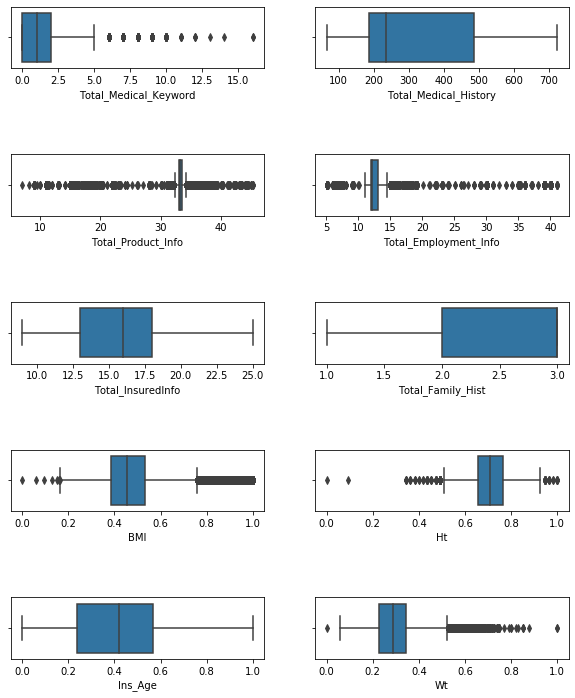

In [0]:
# >>> ax = sns.boxplot(x="day", y="total_bill", data=tips)
import seaborn as sns
import matplotlib.pyplot as plt

f=plt.figure(figsize = (10,12))

f.add_subplot(9,2,1)
sns.boxplot(x = data['Total_Medical_Keyword'])
f.add_subplot(9,2,2)
sns.boxplot(x = data['Total_Medical_History'])
f.add_subplot(9,2,5)
sns.boxplot(x = data['Total_Product_Info'])
f.add_subplot(9,2,6)
sns.boxplot(x = data['Total_Employment_Info'])
f.add_subplot(9,2,9)
sns.boxplot(x = data['Total_InsuredInfo'])
f.add_subplot(9,2,10)
sns.boxplot(x = data['Total_Family_Hist'])
f.add_subplot(9,2,13)
sns.boxplot(x = data['BMI'])
f.add_subplot(9,2,14)
sns.boxplot(x = data['Ht'])
f.add_subplot(9,2,17)
sns.boxplot(x = data['Ins_Age'])
f.add_subplot(9,2,18)
sns.boxplot(x = data['Wt'])

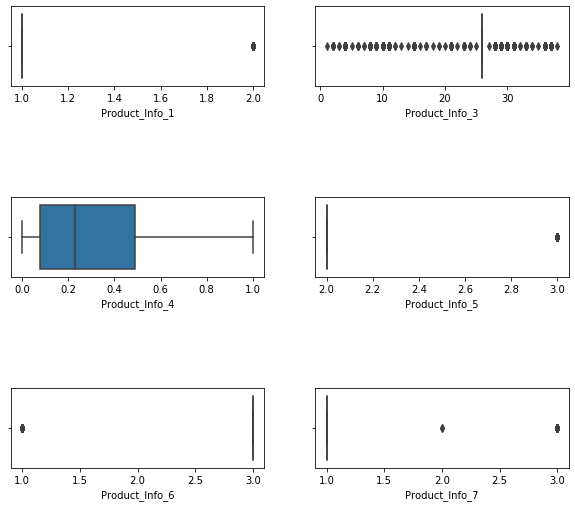

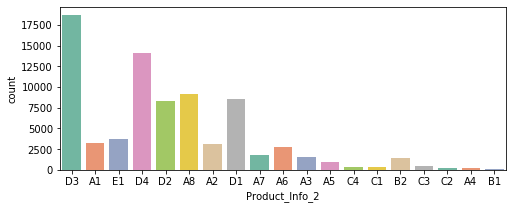

In [0]:
f=plt.figure(figsize = (10,12))

f.add_subplot(7,2,1)
sns.boxplot(x = data['Product_Info_1'])
f.add_subplot(7,2,2)
sns.boxplot(x = data['Product_Info_3'])
f.add_subplot(7,2,5)
sns.boxplot(x = data['Product_Info_4'])
f.add_subplot(7,2,6)
sns.boxplot(x = data['Product_Info_5'])
f.add_subplot(7,2,9)
sns.boxplot(x = data['Product_Info_6'])
f.add_subplot(7,2,10)
sns.boxplot(x = data['Product_Info_7'])

g=plt.figure(figsize = (8,3))
g.add_subplot(1,1,1)
sns.countplot(x = data['Product_Info_2'], palette = 'Set2')

In [0]:
print(data.columns.values)

['BMI' 'Employment_Info_1' 'Employment_Info_2' 'Employment_Info_3'
 'Employment_Info_5' 'Family_Hist_1' 'Ht' 'Ins_Age' 'Insurance_History_1'
 'Insurance_History_2' 'Insurance_History_3' 'Insurance_History_4'
 'Insurance_History_7' 'Insurance_History_8' 'Insurance_History_9'
 'InsuredInfo_1' 'InsuredInfo_2' 'InsuredInfo_3' 'InsuredInfo_4'
 'InsuredInfo_5' 'InsuredInfo_6' 'InsuredInfo_7' 'Medical_History_11'
 'Medical_History_12' 'Medical_History_13' 'Medical_History_14'
 'Medical_History_16' 'Medical_History_17' 'Medical_History_18'
 'Medical_History_19' 'Medical_History_2' 'Medical_History_20'
 'Medical_History_21' 'Medical_History_22' 'Medical_History_23'
 'Medical_History_25' 'Medical_History_26' 'Medical_History_27'
 'Medical_History_28' 'Medical_History_29' 'Medical_History_3'
 'Medical_History_30' 'Medical_History_31' 'Medical_History_33'
 'Medical_History_34' 'Medical_History_35' 'Medical_History_36'
 'Medical_History_37' 'Medical_History_38' 'Medical_History_39'
 'Medical_Histor

--------------------------------------------------------------------------------------------
                                RESPONSE/TARGET PROPORTION                                  
--------------------------------------------------------------------------------------------


Text(0, 0.5, 'Frekuensi')

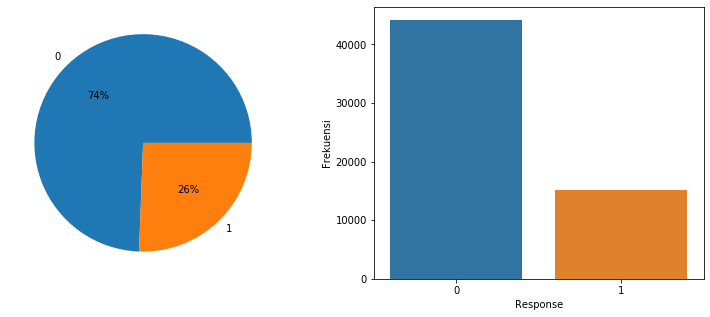

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# plt.figure(figsize=(8,6))
# target.value_counts().plot.pie(autopct='%.0f%%')
# plt.title('Response Proportion')
# plt.ylabel('')

print('--------------------------------------------------------------------------------------------')
print('                                RESPONSE/TARGET PROPORTION                                  ')
print('--------------------------------------------------------------------------------------------')

f=plt.figure(figsize = (13,5))

f.add_subplot(1,2,1)
train['Response'].value_counts().plot.pie(autopct = '%.0f%%')
# plt.title('Target Proportion')
plt.ylabel('')

f.add_subplot(1,2,2)
sns.countplot(train['Response'])
# plt.title('Target Proportion')
plt.ylabel('Frekuensi')

In [104]:
dummy = data['Product_Info_2']
df_dummies = pd.get_dummies(dummy)
df_dummies.head()

,A1,A2,A3,A4,A5,A6,A7,A8,B1,B2,C1,C2,C3,C4,D1,D2,D3,D4,E1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_5,Family_Hist_1,Ht,Ins_Age,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_7,Insurance_History_8,Insurance_History_9,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_2,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,...,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt,Total_Medical_Keyword,Total_Medical_History,Total_Product_Info,Total_Employment_Info,Total_InsuredInfo,Total_Insurance_History,Total_Family_Hist,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,0.323008,0.028,12,1,3,2,0.581818,0.641791,1,1,3,1,1,1,2,1,2,6,3,1,2,1,3,2,3,3,3,3,1,1,112,2,1,2,3,1,3,3,1,3,...,0,0,0,0,0,0,0,1,10,0.076923,2,1,1,0.148536,0,186,15.076923,16.028,16,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.272288,0.000,1,3,2,2,0.600000,0.059701,2,1,3,1,1,3,2,1,2,6,3,1,2,1,3,2,3,3,1,3,1,1,412,2,1,2,3,1,3,3,1,3,...,0,0,0,0,0,0,0,1,26,0.076923,2,3,1,0.131799,0,482,33.076923,6.000,16,13,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.428780,0.030,9,1,2,3,0.745455,0.029851,2,1,1,3,3,2,3,1,2,8,3,1,1,1,3,2,3,3,1,3,1,1,3,2,1,2,3,2,2,3,1,3,...,0,0,0,0,0,0,0,1,26,0.076923,2,3,1,0.288703,0,78,33.076923,12.030,17,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.352438,0.042,9,1,3,3,0.672727,0.164179,2,1,1,3,3,2,3,2,2,8,3,1,2,1,3,2,3,3,1,3,1,1,350,2,2,2,3,1,3,3,1,3,...,0,0,0,0,0,0,0,1,10,0.487179,2,3,1,0.205021,1,425,17.487179,13.042,19,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.424046,0.027,9,1,2,2,0.654545,0.417910,2,1,1,3,3,2,3,1,2,6,3,1,2,1,3,2,3,3,1,3,1,1,162,2,1,2,3,2,2,3,1,3,...,0,0,0,0,0,0,0,1,26,0.230769,2,3,1,0.234310,0,237,33.230769,12.027,16,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
data_dummies.shape

(79146, 139)

In [0]:
# print(data_dummies.columns.values)

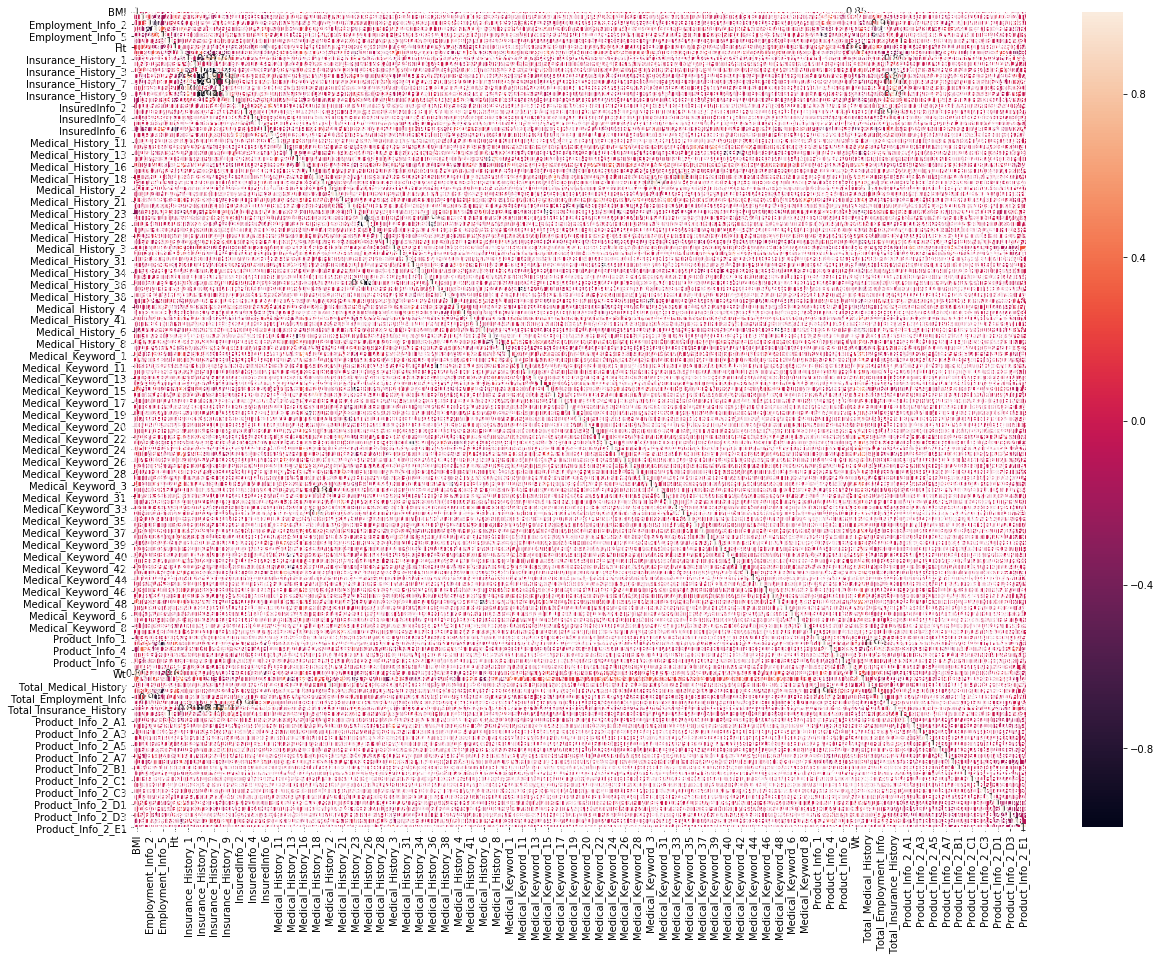

In [0]:
plt.figure(figsize = (20,15))
sns.heatmap(data_dummies.corr(), annot = True)

In [0]:
import numpy as np

corr_matrix = data_dummies.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
corr_datadummies = corr_matrix.mask(mask)

# List column names of highly correlated features (r > 0.70)
will_drop = [c for c in corr_datadummies.columns if any(corr_datadummies[c] > 0.70)]

# Drop the features in the will_drop list
data_final = data_dummies.drop(will_drop, axis = 1)
print('after did multicollinearity, updated features in data : {} features'.format(data_final.shape[1]))

after did multicollinearity, updated features in data : 118 features


In [0]:
print(data_final.columns.values)

['Employment_Info_1' 'Employment_Info_3' 'Ins_Age' 'Insurance_History_2'
 'Insurance_History_8' 'InsuredInfo_1' 'InsuredInfo_2' 'InsuredInfo_4'
 'InsuredInfo_5' 'InsuredInfo_6' 'InsuredInfo_7' 'Medical_History_11'
 'Medical_History_12' 'Medical_History_13' 'Medical_History_14'
 'Medical_History_16' 'Medical_History_17' 'Medical_History_18'
 'Medical_History_20' 'Medical_History_21' 'Medical_History_22'
 'Medical_History_27' 'Medical_History_28' 'Medical_History_29'
 'Medical_History_3' 'Medical_History_30' 'Medical_History_31'
 'Medical_History_34' 'Medical_History_35' 'Medical_History_36'
 'Medical_History_38' 'Medical_History_4' 'Medical_History_40'
 'Medical_History_41' 'Medical_History_5' 'Medical_History_7'
 'Medical_History_8' 'Medical_History_9' 'Medical_Keyword_1'
 'Medical_Keyword_10' 'Medical_Keyword_11' 'Medical_Keyword_12'
 'Medical_Keyword_13' 'Medical_Keyword_14' 'Medical_Keyword_15'
 'Medical_Keyword_16' 'Medical_Keyword_17' 'Medical_Keyword_18'
 'Medical_Keyword_19' 'Me

In [0]:
data_final.head().round(2)

,Employment_Info_1,Employment_Info_3,Ins_Age,Insurance_History_2,Insurance_History_8,InsuredInfo_1,InsuredInfo_2,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_31,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_4,Medical_History_40,Medical_History_41,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,...,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt,Total_Medical_Keyword,Total_Medical_History,Total_Product_Info,Total_Employment_Info,Total_InsuredInfo,Total_Insurance_History,Total_Family_Hist,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,0.03,1,0.64,1,1,1,2,3,1,2,1,3,2,3,3,3,3,1,2,1,2,3,1,3,2,2,3,3,1,2,1,1,3,3,1,2,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0.08,2,1,1,0.15,0,186,15.08,16.03,16,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.00,3,0.06,1,3,1,2,3,1,2,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,1,1,2,1,1,3,1,1,2,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0.08,2,3,1,0.13,0,482,33.08,6.00,16,13,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.03,1,0.03,1,2,1,2,3,1,1,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,3,1,3,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0.08,2,3,1,0.29,0,78,33.08,12.03,17,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.04,1,0.16,1,2,2,2,3,1,2,1,3,2,3,3,1,3,1,2,2,2,3,1,3,2,2,3,3,1,2,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0.49,2,3,1,0.21,1,425,17.49,13.04,19,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.03,1,0.42,1,2,1,2,3,1,2,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,3,1,3,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0.23,2,3,1,0.23,0,237,33.23,12.03,16,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
data_train = data_final[:59381]
data_train.shape

(59381, 118)

In [0]:
data_test = data_final[59381:]
data_test.shape

(19765, 118)

In [0]:
data_train.head()

,Employment_Info_1,Employment_Info_3,Ins_Age,Insurance_History_2,Insurance_History_8,InsuredInfo_1,InsuredInfo_2,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_31,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_4,Medical_History_40,Medical_History_41,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,...,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt,Total_Medical_Keyword,Total_Medical_History,Total_Product_Info,Total_Employment_Info,Total_InsuredInfo,Total_Insurance_History,Total_Family_Hist,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1
0,0.028,1,0.641791,1,1,1,2,3,1,2,1,3,2,3,3,3,3,1,2,1,2,3,1,3,2,2,3,3,1,2,1,1,3,3,1,2,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0.076923,2,1,1,0.148536,0,186,15.076923,16.028,16,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.000,3,0.059701,1,3,1,2,3,1,2,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,1,1,2,1,1,3,1,1,2,2,1,0,0,...,0,0,0,0,0,0,0,0,1,0.076923,2,3,1,0.131799,0,482,33.076923,6.000,16,13,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.030,1,0.029851,1,2,1,2,3,1,1,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,3,1,3,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0.076923,2,3,1,0.288703,0,78,33.076923,12.030,17,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.042,1,0.164179,1,2,2,2,3,1,2,1,3,2,3,3,1,3,1,2,2,2,3,1,3,2,2,3,3,1,2,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0.487179,2,3,1,0.205021,1,425,17.487179,13.042,19,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.027,1,0.417910,1,2,1,2,3,1,2,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,3,1,3,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,0,1,0.230769,2,3,1,0.234310,0,237,33.230769,12.027,16,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
data_train['Response'] = train['Response']
data_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Employment_Info_1,Employment_Info_3,Ins_Age,Insurance_History_2,Insurance_History_8,InsuredInfo_1,InsuredInfo_2,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_3,Medical_History_30,Medical_History_31,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_38,Medical_History_4,Medical_History_40,Medical_History_41,Medical_History_5,Medical_History_7,Medical_History_8,Medical_History_9,Medical_Keyword_1,Medical_Keyword_10,...,Medical_Keyword_47,Medical_Keyword_48,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Product_Info_1,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Wt,Total_Medical_Keyword,Total_Medical_History,Total_Product_Info,Total_Employment_Info,Total_InsuredInfo,Total_Insurance_History,Total_Family_Hist,Product_Info_2_A1,Product_Info_2_A2,Product_Info_2_A3,Product_Info_2_A4,Product_Info_2_A5,Product_Info_2_A6,Product_Info_2_A7,Product_Info_2_A8,Product_Info_2_B1,Product_Info_2_B2,Product_Info_2_C1,Product_Info_2_C2,Product_Info_2_C3,Product_Info_2_C4,Product_Info_2_D1,Product_Info_2_D2,Product_Info_2_D3,Product_Info_2_D4,Product_Info_2_E1,Response
0,0.028,1,0.641791,1,1,1,2,3,1,2,1,3,2,3,3,3,3,1,2,1,2,3,1,3,2,2,3,3,1,2,1,1,3,3,1,2,2,1,0,0,...,0,0,0,0,0,0,0,1,0.076923,2,1,1,0.148536,0,186,15.076923,16.028,16,10,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.000,3,0.059701,1,3,1,2,3,1,2,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,1,1,2,1,1,3,1,1,2,2,1,0,0,...,0,0,0,0,0,0,0,1,0.076923,2,3,1,0.131799,0,482,33.076923,6.000,16,13,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.030,1,0.029851,1,2,1,2,3,1,1,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,3,1,3,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,1,0.076923,2,3,1,0.288703,0,78,33.076923,12.030,17,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0.042,1,0.164179,1,2,2,2,3,1,2,1,3,2,3,3,1,3,1,2,2,2,3,1,3,2,2,3,3,1,2,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,1,0.487179,2,3,1,0.205021,1,425,17.487179,13.042,19,15,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.027,1,0.417910,1,2,1,2,3,1,2,1,3,2,3,3,1,3,1,2,1,2,3,1,3,2,2,3,3,1,3,1,2,3,1,1,2,2,2,0,0,...,0,0,0,0,0,0,0,1,0.230769,2,3,1,0.234310,0,237,33.230769,12.027,16,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [0]:
data_train.to_csv('drive/My Drive/data final test/train_clean.csv')

In [0]:
X = data_train.drop(columns = 'Response', axis = 1)
y = data_train['Response']

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Text(0.5, 1.0, 'Proportion of y_train')

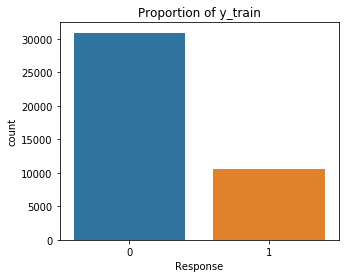

In [0]:
f = plt.figure(figsize = (5,4))

sns.countplot(y_train)
plt.title('Proportion of y_train')

In [0]:
import imblearn
from imblearn.over_sampling import SMOTE

X_columns = list(X_train.columns)

smote = SMOTE(random_state = 42)
SMOTE()
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

X_train_sm = pd.DataFrame(X_train_sm, columns = X_columns)
(y_train_sm == 0).sum(), (y_train_sm == 1).sum()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


(30938, 30938)

Text(0.5, 1.0, 'Proportion of y_train_smote')

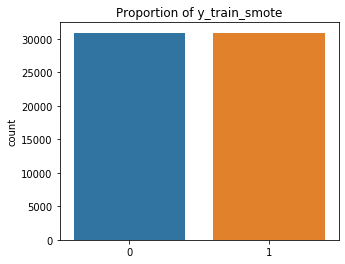

In [0]:
f = plt.figure(figsize = (5,4))

sns.countplot(y_train_sm)
plt.title('Proportion of y_train_smote')

In [0]:
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score

## collect all model in one list
models = [DecisionTreeClassifier,
          LogisticRegression,
          KNeighborsClassifier,
          GaussianNB,
          # SVC,
          # LinearSVC,
          RandomForestClassifier,
          GradientBoostingClassifier,
          XGBClassifier,
          ExtraTreesClassifier]

## loop for all model
datatrain = []
datatest = []
recall = []
precision = []
f1score = []
AUC = []

for i in models:
  model = i()
  model.fit(X_train_sm, y_train_sm)
  y_pred = model.predict(X_test)
  datatrain.append(model.score(X_train_sm, y_train_sm))
  datatest.append(model.score(X_test, y_test))
  recall.append(recall_score(y_test, y_pred))
  precision.append(precision_score(y_test, y_pred))
  f1score.append(f1_score(y_test, y_pred)),
  AUC.append(roc_auc_score(y_test, y_pred))
  # print(i, model.score(X_train_sm, y_train_sm), model.score(X_test, y_test))

all_model = ['Decision Tree Classifier',
             'Logistic Regression',
             'K-Neighbors Classifier',
             'Gaussian Naive Bayes',
            #  'Support Vector Classifier (SVC)',
            #  'Linear SVC',
             'Random Forest Classifier',
             'Gradient Boosting Classifier',
             'XGBoost Classifier',
             'Extra Trees Classifier']

# compare model each other
df_model = pd.DataFrame()
df_model['Model'] = all_model
df_model['Accuracy_Train'] = datatrain
df_model['Accuracy_Test'] = datatest
df_model['Precision'] = precision
df_model['Recall']= recall
df_model['F1_score']= f1score
df_model['AUC']= AUC
df_model['Gap_Train_Test'] = abs(df_model['Accuracy_Train'] - df_model['Accuracy_Test'])
# df_model.sort_values(by = 'Accuracy_Test', ascending = False)
df_model

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,Model,Accuracy_Train,Accuracy_Test,Precision,Recall,F1_score,AUC,Gap_Train_Test
0,Decision Tree Classifier,0.999968,0.699467,0.421643,0.460192,0.440075,0.621133,0.300501
1,Logistic Regression,0.725532,0.725344,0.475810,0.690507,0.563398,0.713939,0.000188
2,K-Neighbors Classifier,0.834589,0.592815,0.337020,0.606518,0.433281,0.597301,0.241773
3,Gaussian Naive Bayes,0.652983,0.721358,0.463102,0.538058,0.497774,0.661349,0.068375
4,Random Forest Classifier,0.990497,0.766433,0.586819,0.303806,0.400346,0.614978,0.224064
5,Gradient Boosting Classifier,0.854063,0.787763,0.636993,0.402231,0.493096,0.661547,0.066300
6,XGBoost Classifier,0.854176,0.787932,0.644891,0.386483,0.483315,0.656505,0.066245
7,Extra Trees Classifier,0.999968,0.770755,0.595536,0.332677,0.426887,0.627337,0.229213


In [0]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

to_bar = pd.DataFrame([data_final.columns[indices],importances[indices]]).transpose()
to_bar.columns = ['Feature','Value']

# Print the feature ranking
print("Feature ranking:")

# top 20 feature importance
for f in range(32):
    print("%d. feature %s (%f)" % (f + 1, data_final.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Medical_History_4 (0.067108)
2. feature Medical_Keyword_15 (0.044461)
3. feature InsuredInfo_6 (0.040317)
4. feature Product_Info_4 (0.036491)
5. feature Wt (0.034250)
6. feature Product_Info_2_D4 (0.030975)
7. feature Medical_Keyword_3 (0.030014)
8. feature Total_Medical_Keyword (0.026975)
9. feature Product_Info_2_D1 (0.025985)
10. feature Ins_Age (0.025886)
11. feature Total_Medical_History (0.023815)
12. feature Total_Employment_Info (0.023257)
13. feature Employment_Info_1 (0.022348)
14. feature Total_InsuredInfo (0.021840)
15. feature Total_Product_Info (0.020180)
16. feature Product_Info_2_D3 (0.020134)
17. feature Insurance_History_8 (0.018950)
18. feature Total_Family_Hist (0.017452)
19. feature Total_Insurance_History (0.017250)
20. feature Product_Info_2_A8 (0.016585)
21. feature InsuredInfo_1 (0.015983)
22. feature InsuredInfo_4 (0.015941)
23. feature Medical_Keyword_48 (0.015372)
24. feature Medical_History_41 (0.015308)
25. feature Medical_Hist

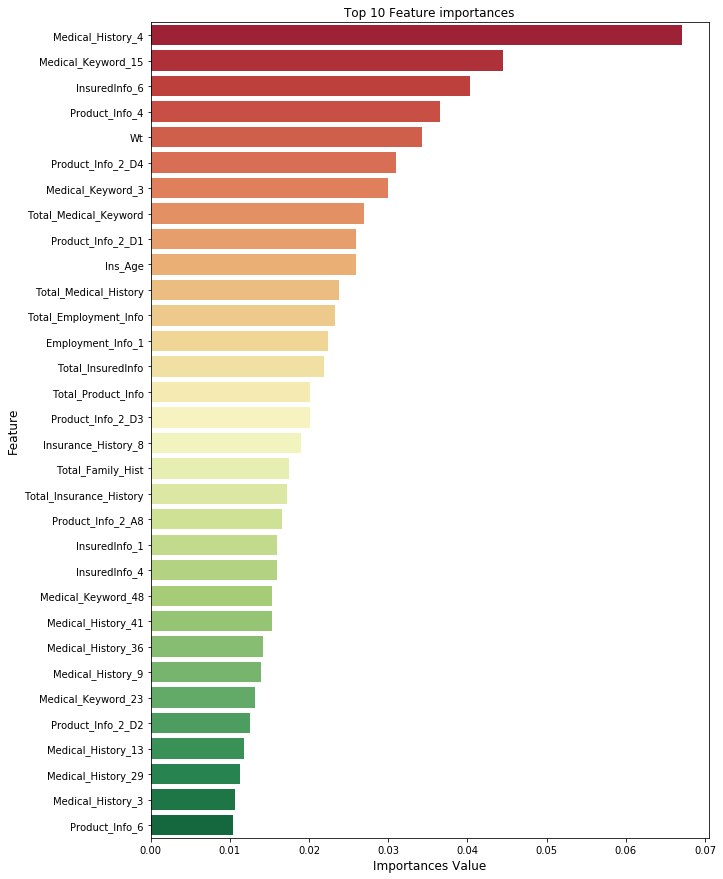

In [0]:
# Plot the feature importances of the forest
plt.figure(1, figsize=(10, 15))
plt.title("Top 10 Feature importances")
ax = sns.barplot(x = 'Value',
                 y = 'Feature',
                 data = to_bar[0:32],
                 palette = 'RdYlGn')
plt.xlabel('Importances Value', fontsize = 12)
plt.ylabel('Feature', fontsize = 12)
plt.show()

In [0]:
# !pip install scorecardpy

[INFO] filtering variables ...
Variable filtering on 59381 rows and 119 columns in 00:00:15 
93 variables are removed
[INFO] creating woe binning ...
Binning on 59381 rows and 26 columns in 00:00:14
[INFO] converting into woe values ...
[INFO] converting into woe values ...


/usr/local/lib/python3.6/dist-packages/scorecardpy/perf.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ], ignore_index=True)


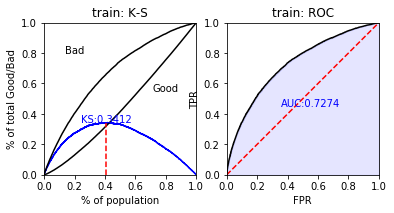

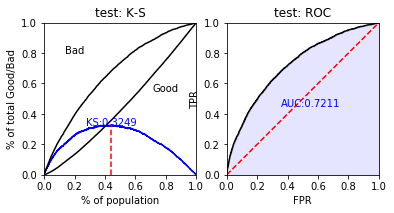

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


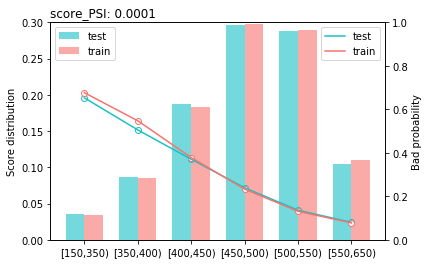

{'pic': {'score': <Figure size 432x288 with 2 Axes>},
 'psi':   variable       PSI
 0    score  0.000132}

In [0]:
# Traditional Credit Scoring Using Logistic Regression

import scorecardpy as sc

# data prepare -----
df = data_train.copy()

# filter variable via missing rate, iv, identical value rate
dt_s = sc.var_filter(df, y = 'Response')

# breaking dt into train and test
train, test = sc.split_df(dt_s, 'Response').values()

# woe binning ------
bins = sc.woebin(dt_s, y = 'Response')
# sc.woebin_plot(bins)

# binning adjustment
# # adjust breaks interactively
# breaks_adj = sc.woebin_adj(dt_s, "Target", bins) 
# # or specify breaks manually
#breaks_adj = {}
#bins_adj = sc.woebin(dt_s, y="Target", breaks_list=breaks_adj)

# converting train and test into woe values
train_woe = sc.woebin_ply(train, bins)
test_woe = sc.woebin_ply(test, bins)

y_train_ = train_woe.loc[:,'Response']
X_train_ = train_woe.loc[:, train_woe.columns != 'Response']
y_test_ = test_woe.loc[:,'Response']
X_test_ = test_woe.loc[:,train_woe.columns != 'Response']

# logistic regression ------
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                            intercept_scaling=1, l1_ratio=None, max_iter=100,
                            multi_class='warn', n_jobs=None, penalty='l1',
                            random_state=None, solver='saga', tol=0.0001, verbose=0,
                            warm_start=False)

logreg.fit(X_train_, y_train_)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = logreg.predict_proba(X_train_)[:,1]
test_pred = logreg.predict_proba(X_test_)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_, train_pred, title = 'train')
test_perf = sc.perf_eva(y_test_, test_pred, title = 'test')

# score ------
card = sc.scorecard(bins, logreg, X_train_.columns)

# credit score
train_score = sc.scorecard_ply(train, card, print_step=0)
test_score = sc.scorecard_ply(test, card, print_step=0)

# psi
sc.perf_psi(score = {'train':train_score, 'test':test_score},
            label = {'train':y_train, 'test':y_test})

In [0]:
scard = pd.DataFrame()
for i in card:
  scd = pd.DataFrame(card[i])
  scard = scard.append(scd)
scard

,variable,bin,points
0,basepoints,NaN,464.0
0,Total_Medical_History,"[-inf,170.0)",-1.0
1,Total_Medical_History,"[170.0,200.0)",-13.0
2,Total_Medical_History,"[200.0,340.0)",10.0
3,Total_Medical_History,"[340.0,510.0)",-1.0
4,Total_Medical_History,"[510.0,560.0)",-25.0
5,Total_Medical_History,"[560.0,inf)",8.0
7,Total_Product_Info,"[-inf,32.90000000000002)",4.0
8,Total_Product_Info,"[32.90000000000002,33.10000000000002)",-15.0
9,Total_Product_Info,"[33.10000000000002,33.300000000000026)",-1.0


In [0]:
# fit model no training data
model_logreg = LogisticRegression()
model_logreg.fit(X_train_sm, y_train_sm)

# make predictions for test data
y_pred = model_logreg.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 72.53%


In [0]:
y_prob = model_logreg.predict_proba(X_test)

In [0]:
from sklearn.metrics import roc_curve

def plot_roc_curve(ypred, predictions):
    """Plot the roc curve for base learners and ensemble."""
    plt.figure(figsize = (10, 8))
    plt.plot([0, 1], [0, 1], 'k--')

    fpr, tpr, _ = roc_curve(y_test, predictions)
    plt.plot(fpr, tpr)
        
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.show()

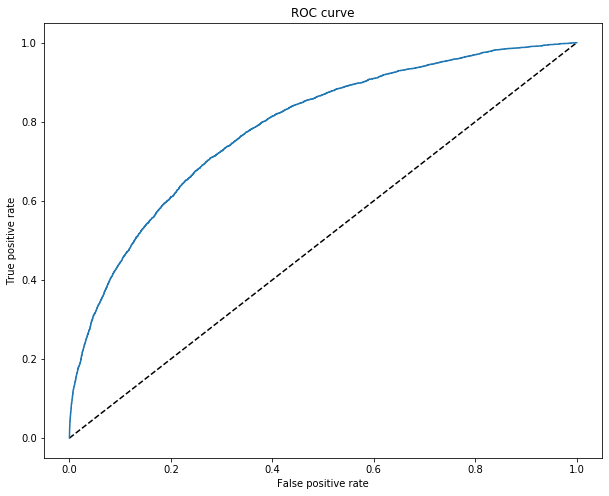

In [0]:
plot_roc_curve(y_test, y_prob[:,1])

In [0]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,9765,3478
1,1415,3157


In [0]:
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,precision_recall_curve

print("Accuracy Train: ", roc_auc_score(y_test, y_pred))
print("Accuracy Test: ", roc_auc_score(y_test, predictions))
print('\n')
print("Classification Report: \n", classification_report(y_test, predictions))
# print("Confusion Matrix: \n", confusion_matrix(y_test, predictions))

Accuracy Train:  0.7139390614853954
Accuracy Test:  0.7139390614853954


Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80     13243
           1       0.48      0.69      0.56      4572

    accuracy                           0.73     17815
   macro avg       0.67      0.71      0.68     17815
weighted avg       0.77      0.73      0.74     17815

